# Graded Assignment
# Visualizing Data

For this practice assignment some of the code has been written for you ahead of time.  Cells you just need to run are mark 'Run this cell'.  For each question, there are clear instructions in each cell. Follow those instructions and write the code after each block of:

YOUR CODE HERE

Please use the exact variable name if it is specified in the comment.

We’ll run a Python test script against your program to test whether each function implementation is correct.

In [1]:
%%capture
###########################################################
### EXECUTE THIS CELL BEFORE YOU TO TEST YOUR SOLUTIONS ###
###########################################################
"""
Loading the necessary python libraries
"""
import imp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nose.tools import assert_equal
from pandas.util.testing import assert_frame_equal, assert_series_equal
sol = imp.load_compiled("sol", "./.sol.py")

In [2]:
"""
First we need to load the dataset and preprocess the data (see Practice Assignment 01 for details)
"""

#Run this code
restaurant_location_df = pd.read_csv("geoplaces2.csv")
restaurant_accept_df = pd.read_csv("chefmozaccepts.csv")
restaurant_cuisine_df = pd.read_csv("chefmozcuisine.csv")
rating_final_df = pd.read_csv("rating_final.csv")
user_profile_df = pd.read_csv("userprofile.csv")

restaurant_location_df = restaurant_location_df[["placeID", "name", "address", "city", "state", "country", "price", "alcohol"]]
restaurant_location_df = restaurant_location_df.apply(lambda x: x.astype(str).str.lower())
restaurant_location_df = restaurant_location_df.astype({'placeID':'int',"name":"string", "address":"string","city":"string", "state":"string", "country":"string", "price":"string", "alcohol": "string"})
restaurant_location_df = restaurant_location_df.replace('\?', np.nan, regex=True).dropna().reset_index(drop = True)
user_profile_df = user_profile_df.replace('\?', np.nan, regex=True)
user_profile_df = user_profile_df[['userID', 'smoker', 'drink_level', 'marital_status', 'birth_year']]

#Since The values in column 'smoker' are strings, we have to convert them to boolean values
user_profile_df['smoker'] = user_profile_df['smoker'].map({'true': True, 'false': False})
restaurant_location_df.info()
###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   placeID  130 non-null    int64 
 1   name     130 non-null    string
 2   address  130 non-null    string
 3   city     130 non-null    string
 4   state    130 non-null    string
 5   country  130 non-null    string
 6   price    130 non-null    string
 7   alcohol  130 non-null    string
dtypes: int64(1), string(7)
memory usage: 8.2 KB


In [3]:
"""
Part 01:

1. Creat a dataFrame called "alcohol_service_count_df" containing two columns 'alcohol' and 'count'.
   a. The 'alcohol' is one default column from the "restaurant_location_df" dataframe.
   b. The 'count' column should represent the count of each 'alcohol_service' type.

Hint: a. To count the number of different types, use groupby(), as well as size() and reset_index().
      b. Here is a useful link for renaming a column 'count': 
         https://stackoverflow.com/questions/17995024/how-to-assign-a-name-to-the-size-column

2. Draw a barplot using sns.
The xlabel is 'Alcohol Service Type'
The ylabel is 'Count'
The title is 'Alcohol Service Count for Different Types'
Set the figure size to 5, 5
"""

# YOUR CODE HERE
# Count each alcohol service type
alcohol_service_count_df = restaurant_location_df.groupby('alcohol').size().reset_index(name='count')
alcohol_service_count_df


,alcohol,count
0,full_bar,9
1,no_alcohol_served,87
2,wine-beer,34


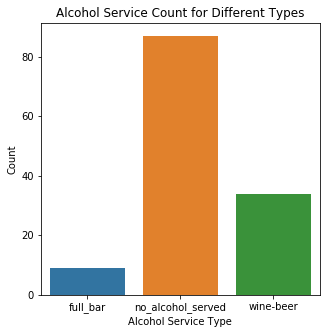

In [4]:
# Plotting
plt.figure(figsize=(5, 5))
sns.barplot(data=alcohol_service_count_df, x='alcohol', y='count')

# Adding labels and title
plt.xlabel('Alcohol Service Type')
plt.ylabel('Count')
plt.title('Alcohol Service Count for Different Types')

# Show plot
plt.show()


In [5]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(alcohol_service_count_df, sol.alcohol_service_count_df)
print("test alcohol_service_count_df correct")

test alcohol_service_count_df correct


In [6]:
"""
Part 02:

1. You need to create a dataframe named "restaurant_mean_rating_df" that contains information about the average
food rating and service rating for each restaurant.
To do this, merge the dataframes "rating_final_df" and "restaurant_location_df" based on the 'placeID' column.
The new dataframe should include the columns 'name', 'food_rating', and 'service_rating'.
Then group them by the 'name' column to calculate the average food rating and service rating.

2. Draw a Heatmap using sns
The x-axis represents "food_rating" and "service_rating"
The y-axis corresponds to the different restaurant names
The colors in the heatmap represent ratings. Use 'coolwarm' for the color map style.
Set the graph size using plt.figure(figsize=(10, 20))
"""

# YOUR CODE HERE

# Merge on placeID
merged_df = pd.merge(rating_final_df, restaurant_location_df, on='placeID')

# Select relevant columns
ratings_df = merged_df[['name', 'food_rating', 'service_rating']]

# Compute average ratings per restaurant
restaurant_mean_rating_df = ratings_df.groupby('name', as_index=True).mean()

restaurant_mean_rating_df

,food_rating,service_rating
name,,
abondance restaurante bar,0.500000,0.750000
arrachela grill,1.333333,1.000000
cabana huasteca,1.461538,1.307692
cafe ambar,1.000000,1.000000
cafe chaires,1.000000,0.933333
...,...,...
tortas hawai,1.333333,1.000000
tortas locas hipocampo,1.472222,1.166667
tortas y hamburguesas el gordo,1.000000,0.400000


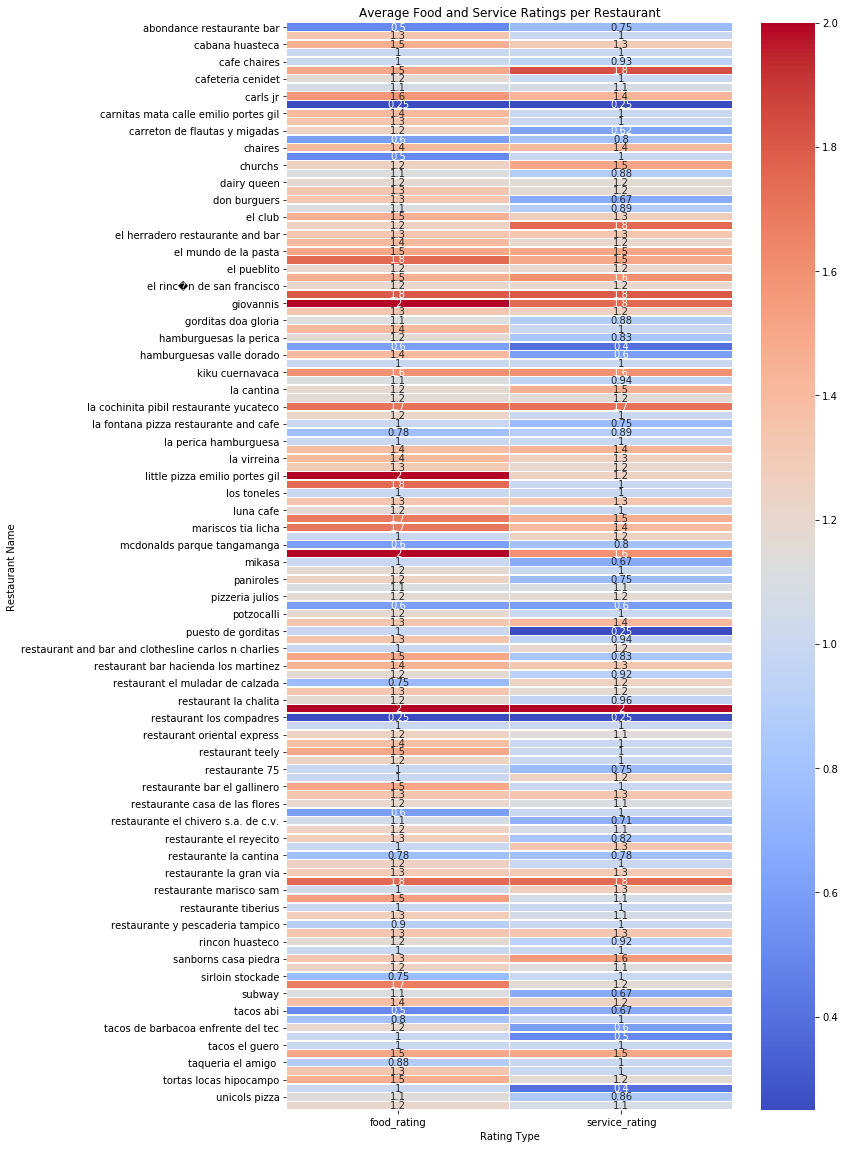

In [7]:
# Set index for heatmap shape
heatmap_data = restaurant_mean_rating_df
# Plotting the heatmap
plt.figure(figsize=(10, 20))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)

# Title and labels
plt.title('Average Food and Service Ratings per Restaurant')
plt.xlabel('Rating Type')
plt.ylabel('Restaurant Name')
plt.show()


In [8]:
##########################
### TEST YOUR SOLUTION ###
##########################


assert_frame_equal(restaurant_mean_rating_df, sol.restaurant_mean_rating_df)
print("test restaurant_mean_rating_df correct")



test restaurant_mean_rating_df correct
